In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils.config import load_config
import yfinance as yf
import numpy as np
from src.utils.logger import logger


class Var:
    def __init__(self,config):
        self.config = config
        self.stock_data = None

        
    def load_data(self):
        """
        Loads in data from yfinance
        """
        self.stock_data = yf.download(self.config['stock_tickers'],start=self.config['start_date'],end=self.config['end_date'])['Close']
        self.stock_data = self.stock_data.dropna()
        return self.stock_data
    
    def get_returns(self):
        if self.stock_data is None:
            self.load_data()
            
        returns = self.stock_data.pct_change().dropna()
        VaR = np.quantile(returns,0.05)
        logger.info(f'Returns from VaR.py : {returns.head()}')
        logger.info(f'Value at Risk: {Var}')
        print(returns)
        print(VaR)
        plt.figure(figsize=(10, 6))
        plt.hist(returns, bins=100, label="Returns Distribution", alpha=0.7)
        plt.axvline(VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR (5%): {VaR:.4f}')
        plt.title('Distribution of Returns and Value at Risk')
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True)
        plt.show()

C:\Users\katsa\AppData\Local\Temp\ipykernel_1312\3125868386.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.stock_data = yf.download(self.config['stock_tickers'],start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  6 of 6 completed

2025-07-18 07:39:47 - INFO - src.utils.logger - 31 - Returns from VaR.py : Ticker          AAPL     GOOGL      META      MSFT      NVDA      TSLA
Date                                                                  
2020-10-13 -0.026527  0.001585  0.001414  0.006594  0.001564  0.009835
2020-10-14  0.000743 -0.002316 -0.015644 -0.008974 -0.010738  0.032800
2020-10-15 -0.003961 -0.005098 -0.018762 -0.005433 -0.008886 -0.026924
2020-10-16 -0.014000  0.007863 -0.002962  0.000000 -0.011346 -0.020518
2020-10-19 -0.025542 -0.024080 -0.017034 -0.024766 -0.022717 -0.020106
2025-07-18 07:39:47 - INFO - src.utils.logger - 32 - Value at Risk: <class '__main__.Var'>


Ticker          AAPL     GOOGL      META      MSFT      NVDA      TSLA
Date                                                                  
2020-10-13 -0.026527  0.001585  0.001414  0.006594  0.001564  0.009835
2020-10-14  0.000743 -0.002316 -0.015644 -0.008974 -0.010738  0.032800
2020-10-15 -0.003961 -0.005098 -0.018762 -0.005433 -0.008886 -0.026924
2020-10-16 -0.014000  0.007863 -0.002962  0.000000 -0.011346 -0.020518
2020-10-19 -0.025542 -0.024080 -0.017034 -0.024766 -0.022717 -0.020106
...              ...       ...       ...       ...       ...       ...
2025-07-10  0.006015  0.005662 -0.007560 -0.004032  0.007490  0.047283
2025-07-11 -0.005885  0.014469 -0.013379  0.003669  0.004997  0.011747
2025-07-14 -0.012029  0.007603  0.004753 -0.000596 -0.005154  0.010813
2025-07-15  0.002349  0.002423 -0.014606  0.005566  0.040410 -0.019312
2025-07-16  0.005021  0.005330 -0.010529 -0.000395  0.003925  0.035041

[1194 rows x 6 columns]
-0.04020987269285508


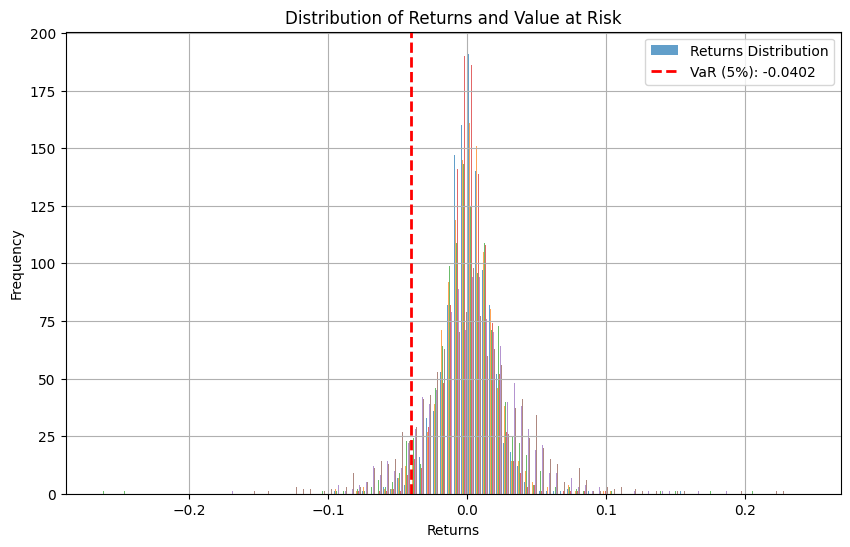

In [2]:
if __name__ == "__main__":
    config = load_config()
    var_obj = Var(config)
    var_obj.load_data()
    var_obj.get_returns()
